# Exploratory Data Analysis

In [ ]:
import kagglehub

path = kagglehub.dataset_download("ealtman2019/credit-card-transactions")
print("Path to dataset files:", path)

The above generally downloads the dataset to a local cache directory so it is easiest to just run ``` mv path/to/cache/directory/your_dataset_name ./data ``` in your terminal to move it to your current working directory.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Interesting to note that all columns except Time, Amount, and Class are obfuscated with PCA. This makes some of my work a bit more difficult since I can't directly interpret feature importance on the original features. Although it does make some of the algorithms I have in mind more applicable since they work better with uncorrelated features.

In [12]:
print("Schema:")
df.describe()

Schema:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [19]:
fraud_count = df['Class'].value_counts()[1]
regular_count = df['Class'].value_counts()[0]
fraud_percentage = round((100 * fraud_count) / (fraud_count + regular_count), 2)

print(f"Only {fraud_percentage}% are fraudulent transactions")

Only 0.17% are fraudulent transactions


Given how imbalanced the data set is with very few fraudulent cases, we have to keep this in mind and apply oversampling/undersampling techniques to prevent overfitting or naive models that just predict the majority class.

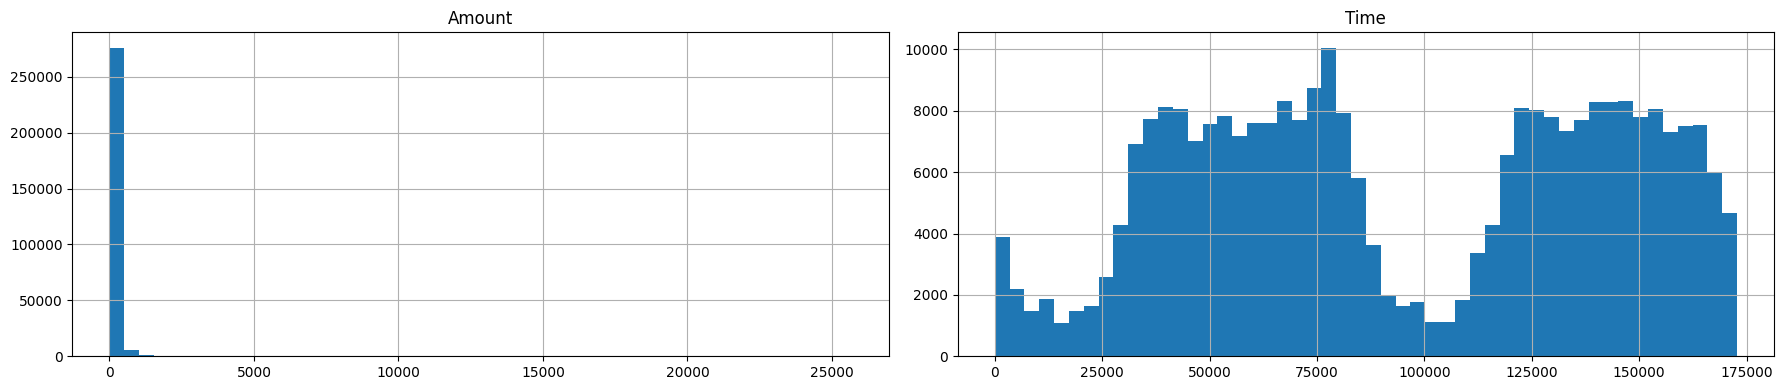

In [ ]:
df[["Amount", "Time"]].hist(bins=50, figsize=(18, 4), layout=(1, 2))
plt.tight_layout()
plt.show()

Just getting a better understanding of the distribution for our Amount and Time features. It appears that Amount if very right skeweed while time appears to be bimodal.

# Stateful Feature Engineering 

The issue that was previously mentioned with the heavily imbalanced class distribution needs to be taken care of with caution. Given the fact that this is assumed to be a real-time fraud detection system, it would be counter-intuitive to standardize or normalize the Amount and Time features based on the training set statistics since in a real-time scenario we would not have access to future data points to compute these statistics. 

## Rolling Z-Score on Amount with Stateful Windowing

In [29]:
# Treat the first 20% of transactions as a reference set and remaining 80% as a stream/test set
split_idx = int(len(df) * 0.20)
train_df = df.iloc[:split_idx].copy()
stream_df = df.iloc[split_idx:].copy()

# Stream Processor Class
class StreamAnomalyDetector:
    def __init__(self, window_size=1000, z_threshold=3.0):
        self.window_size = window_size
        self.z_threshold = z_threshold
        
        # keep the last N amounts to calculate stats
        self.history = [] 
        self.last_time = None
        
        # cache stats to avoid re-calculating on every single event 
        self.stats = {'mean': 0, 'std': 1} 
        
    def _update_stats(self):
        """Updates the rolling mean and std deviation based on history."""
        if not self.history:
            return
        
        # in production this would use Welford's Online Algorithm
        vals = np.array(self.history)
        self.stats['mean'] = np.mean(vals)
        self.stats['std'] = np.std(vals) if len(vals) > 1 else 1
        
        if self.stats['std'] == 0:
            self.stats['std'] = 1

    def process_event(self, event):
        """
        Ingests a single event (row), calculates features, 
        updates state, and returns the anomaly score.
        """
        # --- Feature Engineering ---

        # in production we would have transactions tied to individuals and could use time-delta as a feature
        time_delta = 0
        if self.last_time is not None:
            time_delta = event['Time'] - self.last_time
        
        # calculate Z-Score (The Anomaly Detector)
        z_score = (event['Amount'] - self.stats['mean']) / self.stats['std']
        
        # update state
        self.history.append(event['Amount'])
        if len(self.history) > self.window_size:
            self.history.pop(0) 
            
        self.last_time = event['Time']
        self._update_stats() 
        
        return {
            'Time': event['Time'],
            'Amount': event['Amount'],
            'z_score': z_score,
            'time_delta': time_delta,
            'is_anomaly': abs(z_score) > self.z_threshold
        }

# --- Step 3: Run the Simulation ---

# Initialize the detector
detector = StreamAnomalyDetector(window_size=2000, z_threshold=3.0)

# "Warm up" the detector with the tail of the Training set
# so it doesn't start with 0 mean/std for the first stream event.
print("Warming up detector state...")
for _, row in train_df.tail(2000).iterrows():
    detector.process_event(row)

# Process the Stream
print(f"Streaming {len(stream_df)} events...")
results = []

# In production, this would be an API endpoint receiving JSON.
for _, row in stream_df.iterrows():
    result = detector.process_event(row)
    
    results.append(result)


results_df = pd.DataFrame(results)

anomalies = results_df[results_df['is_anomaly'] == True]
print(f"Detected {len(anomalies)} anomalies in stream.")
results_df.head()

Warming up detector state...
Streaming 227846 events...
Detected 3770 anomalies in stream.


,Time,Amount,z_score,time_delta,is_anomaly
0,47694.0,116.00,0.044775,0.0,False
1,47695.0,55.98,-0.175358,1.0,False
2,47695.0,69.99,-0.124043,0.0,False
3,47695.0,5.37,-0.361035,0.0,False
4,47695.0,0.89,-0.377348,0.0,False


## Why so many false-positives with the above implementation?

The high number of false positives (3,770 flagged vs. ~350 actual) is expected because a univariate Z-Score on Amount ignores the context provided by features V1-V28. A fraudulent transaction might make a $50 purchase (normal amount) but at a strange time or location (abnormal V vector), which a simple Z-Score would miss or misinterpret.

To reduce false positives and improve precision, we should add mechanisms that look at the multivariate nature of the data (the relationship between features).

## Hybrid Stream Processor 

In [ ]:
# --- Supervised model on reference data + Unsupervised model on streaming data ---


from sklearn.ensemble import RandomForestClassifier, IsolationForest


class RobustStreamDetector:
    def __init__(self, reference_df, window_size=1000):
        self.window_size = window_size
        self.history = [] 
        self.stats = {'mean': 0, 'std': 1}
        
        # ---  SUPERVISED MODEL  ---
        # train a lightweight Random Forest on the reference data
        # we use class_weight='balanced' to handle the imbalanced 0.17% fraud rate 
        print("Training Supervised Model (Random Forest)...")
        self.rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, 
                                               class_weight='balanced', random_state=42)
        X_ref = reference_df.drop(['Time', 'Class'], axis=1)
        y_ref = reference_df['Class']
        self.rf_model.fit(X_ref, y_ref)
        
        # --- UNSUPERVISED MODEL ---
        # Isolation Forest learns the "shape" of normal data
        print("Training Unsupervised Model (Isolation Forest)...")
        self.iso_model = IsolationForest(contamination=0.01, random_state=42)
        self.iso_model.fit(X_ref)
        
        # --- STATISTICAL BASELINES  ---
        # pre-calculate stats for V1-V28 to compute "Distance" in real-time
        # this is a simplified Mahalanobis distance (assuming independence since PCA)
        self.v_cols = [c for c in X_ref.columns if c.startswith('V')]
        self.v_stats = {
            'mean': X_ref[self.v_cols].mean().values,
            'std': X_ref[self.v_cols].std().values
        }

    def _update_rolling_stats(self):
        """Simple rolling window update for 'Amount'"""
        if not self.history: return
        vals = np.array(self.history)
        self.stats['mean'] = np.mean(vals)
        self.stats['std'] = np.std(vals) if len(vals) > 1 else 1
        if self.stats['std'] == 0: self.stats['std'] = 1

    def process_event(self, event):
        """
        Returns a dictionary with votes from all 3 detection mechanisms.
        """
        # Prepare the feature vector (excluding Time/Class) for models
        # reshape it to (1, -1) because models expect a batch
        features = event.drop(['Time', 'Class']).values.reshape(1, -1)
        
        # --- MECHANISM 1: Rolling Z-Score (Amount only) ---
        amount_z = (event['Amount'] - self.stats['mean']) / self.stats['std']
        
        # --- MECHANISM 2: Multivariate Distance (V1-V28) ---
        # standardized Euclidean distance from the reference center
        v_vals = event[self.v_cols].values
        v_z_scores = (v_vals - self.v_stats['mean']) / self.v_stats['std']
        multivariate_dist = np.sqrt(np.sum(np.square(v_z_scores)))
        
        # --- MECHANISM 3: Supervised Prediction ---
        # probability that this is Class 1 (Fraud)
        rf_prob = self.rf_model.predict_proba(features)[0][1]
        
        # --- MECHANISM 4: Isolation Forest Score ---
        # returns -1 for anomaly, 1 for normal, invert it for consistency.
        iso_pred = self.iso_model.predict(features)[0]
        is_iso_anomaly = (iso_pred == -1)

        # --- UPDATE STATE ---
        self.history.append(event['Amount'])
        if len(self.history) > self.window_size:
            self.history.pop(0)
        self._update_rolling_stats()
        
        # --- ENSEMBLE LOGIC ---
        # flag an anomaly if ANY of the following strong signals occur:
        # 1. Supervised model is > 50% confident it's fraud
        # 2. Multivariate distance is extreme (> 20)
        # 3. Isolation Forest says Anomaly AND Amount Z-Score is high (> 3)
        
        is_anomaly = False
        reason = "Normal"
        
        if rf_prob > 0.5:
            is_anomaly = True
            reason = "Supervised Model Flag"
        elif multivariate_dist > 20.0:  
            is_anomaly = True
            reason = "High Multivariate Distance"
        elif is_iso_anomaly and abs(amount_z) > 3.0:
            is_anomaly = True
            reason = "IsoForest + High Amount"

        return {
            'Time': event['Time'],
            'Actual_Class': event['Class'], 
            'RF_Prob': round(rf_prob, 4),
            'Dist_Score': round(multivariate_dist, 2),
            'Amount_Z': round(amount_z, 2),
            'Iso_Anomaly': is_iso_anomaly,
            'Is_Anomaly': is_anomaly,
            'Reason': reason
        }

# --- Simulation Run ---


detector = RobustStreamDetector(train_df)


print(f"Processing stream...")
results = []

for idx, row in stream_df.iterrows():
    res = detector.process_event(row)
    results.append(res)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score


results_df = pd.DataFrame(results)

y_true = results_df['Actual_Class']
y_pred = results_df['Is_Anomaly'].astype(int)

cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm.ravel()

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred) 
fpr = fp / (fp + tn) 

print(f"--- Executive Summary ---")
print(f"True Positives (Caught Fraud): {tp}")
print(f"False Negatives (Missed Fraud): {fn}")
print(f"False Positives (False Alarms): {fp}")
print(f"Recall (Sensitivity): {recall:.2%}")
print(f"Precision: {precision:.2%}")
print(f"False Positive Rate: {fpr:.2%}")

--- Executive Summary ---
True Positives (Caught Fraud): 225
False Negatives (Missed Fraud): 110
False Positives (False Alarms): 1113
Recall (Sensitivity): 67.16%
Precision: 16.82%
False Positive Rate: 0.49%


## Hybrid Stream Processor Improved Execution Speed

In [ ]:
class FastStreamDetector:
    def __init__(self, reference_df, window_size=1000):
        self.window_size = window_size
        
        # Optimization: Use a deque for O(1) pops/appends
        from collections import deque
        self.history = deque(maxlen=window_size)
        
        # State for O(1) rolling stats
        self.running_sum = 0.0
        self.running_sq_sum = 0.0
        self.stats = {'mean': 0, 'std': 1}
        
        
        print("Training Models...")
        self.rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, 
                                               class_weight='balanced', random_state=42)
        X_ref = reference_df.drop(['Time', 'Class'], axis=1)
        y_ref = reference_df['Class']
        self.rf_model.fit(X_ref, y_ref)
        
        self.iso_model = IsolationForest(contamination=0.01, random_state=42)
        self.iso_model.fit(X_ref)
        
        # pre-calc stats
        self.v_cols = [c for c in X_ref.columns if c.startswith('V')]
        self.v_stats_mean = X_ref[self.v_cols].mean().values
        self.v_stats_std = X_ref[self.v_cols].std().values
        
        # Optimization: pre-map column indices for faster access
        # assuming input event is a numpy array, we need to know which index corresponds to 'Amount' and 'Vs'
        self.feature_cols = [c for c in reference_df.columns if c not in ['Time', 'Class']]
        self.amount_idx = self.feature_cols.index('Amount') 
        

    def _update_rolling_stats_incremental(self, new_val, old_val=None):
        """Updates rolling mean/std in O(1) time"""
        
        self.running_sum += new_val
        self.running_sq_sum += new_val ** 2
        
        if old_val is not None:
            self.running_sum -= old_val
            self.running_sq_sum -= old_val ** 2
            count = self.window_size
        else:
            count = len(self.history)

        if count > 1:
            mean = self.running_sum / count
            variance = (self.running_sq_sum / count) - (mean ** 2)
            
            self.stats['mean'] = mean
            self.stats['std'] = np.sqrt(max(variance, 0))
            if self.stats['std'] == 0: self.stats['std'] = 1

    def process_event(self, feature_vector, time_val, actual_class):
        """
        feature_vector: Numpy array of features (V1..V28, Amount)
        """
        # 1. Rolling Z-Score (Amount)
        amount_val = feature_vector[self.amount_idx]
        amount_z = (amount_val - self.stats['mean']) / self.stats['std']
        
        # 2. Multivariate Distance (Vectorized)
        v_vals = feature_vector[:28] 
        v_z_scores = (v_vals - self.v_stats_mean) / self.v_stats_std
        multivariate_dist = np.sqrt(np.sum(np.square(v_z_scores)))
        
        # 3. Model Predictions 
        feat_reshaped = feature_vector.reshape(1, -1)
        rf_prob = self.rf_model.predict_proba(feat_reshaped)[0][1]
        iso_pred = self.iso_model.predict(feat_reshaped)[0]
        is_iso_anomaly = (iso_pred == -1)

        # 4. Update State (O(1))
        old_val = None
        if len(self.history) == self.window_size:
            old_val = self.history[0]
            
        self.history.append(amount_val)
        self._update_rolling_stats_incremental(amount_val, old_val)
        
        # 5. Ensemble Logic
        is_anomaly = False
        reason = "Normal"
        
        if rf_prob > 0.5:
            is_anomaly = True
            reason = "Supervised Model Flag"
        elif multivariate_dist > 20.0:  
            is_anomaly = True
            reason = "High Multivariate Distance"
        elif is_iso_anomaly and abs(amount_z) > 3.0:
            is_anomaly = True
            reason = "IsoForest + High Amount"

        return {
            'Time': time_val,
            'Actual_Class': actual_class,
            'RF_Prob': round(rf_prob, 4),
            'Is_Anomaly': is_anomaly,
            'Reason': reason
        }

# --- Optimized Run Loop ---
# convert to numpy for fast iteration
stream_features = stream_df.drop(['Time', 'Class'], axis=1).values
stream_times = stream_df['Time'].values
stream_classes = stream_df['Class'].values

detector = FastStreamDetector(train_df)
results = []

print("Processing stream (Optimized)...")
# zip is much faster than iterrows
for feats, time_val, cls_val in zip(stream_features, stream_times, stream_classes):
    res = detector.process_event(feats, time_val, cls_val)
    results.append(res)


In [ ]:
results_df = pd.DataFrame(results)

y_true = results_df['Actual_Class']
y_pred = results_df['Is_Anomaly'].astype(int)

cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm.ravel()

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred) 
fpr = fp / (fp + tn) 

print(f"--- Executive Summary ---")
print(f"True Positives (Caught Fraud): {tp}")
print(f"False Negatives (Missed Fraud): {fn}")
print(f"False Positives (False Alarms): {fp}")
print(f"Recall (Sensitivity): {recall:.2%}")
print(f"Precision: {precision:.2%}")
print(f"False Positive Rate: {fpr:.2%}")


--- Executive Summary ---
True Positives (Caught Fraud): 225
False Negatives (Missed Fraud): 110
False Positives (False Alarms): 1113
Recall (Sensitivity): 67.16%
Precision: 16.82%
False Positive Rate: 0.49%


## Hybrid Stream Processor (execution speed, raw value transformations, supervised model improvment)

In [ ]:
from collections import deque
import numpy as np
from sklearn.ensemble import RandomForestClassifier, IsolationForest

class RobustStreamDetectorV2:
    def __init__(
        self,
        reference_df,
        window_size=1000,
        rf_prob_threshold=0.5,
        dist_quantile=0.999,
        amount_z_quantile=0.999,
        iso_contamination=0.01,
        eps=1e-6,
    ):
        self.window_size = int(window_size)
        self.rf_prob_threshold = float(rf_prob_threshold)
        self.eps = float(eps)

        # Cache feature column order once (used for both train and stream)
        drop_cols = {"Time", "Class"}
        self.feature_cols = [c for c in reference_df.columns if c not in drop_cols]

        # Indices for fast slicing on numpy arrays
        self.v_cols = [c for c in self.feature_cols if c.startswith("V")]
        self.v_idx = np.array([self.feature_cols.index(c) for c in self.v_cols], dtype=int)
        self.amount_idx = self.feature_cols.index("Amount") if "Amount" in self.feature_cols else None

        # Build reference matrices once
        X_ref_all = reference_df[self.feature_cols].to_numpy(dtype=float)
        y_ref = reference_df["Class"].to_numpy(dtype=int)

        if self.amount_idx is not None:
          X_ref_all[:, self.amount_idx] = np.log1p(np.maximum(X_ref_all[:, self.amount_idx], 0.0))

        # Supervised model on all reference rows
        self.rf_model = RandomForestClassifier(
            n_estimators=50,
            max_depth=10,
            class_weight="balanced",
            random_state=42,
            n_jobs=-1,
        )
        self.rf_model.fit(X_ref_all, y_ref)

        # Normal-only subset for unsupervised + baselines
        normal_mask = (y_ref == 0)
        X_ref_normal = X_ref_all[normal_mask]

        self.iso_model = IsolationForest(
            contamination=iso_contamination,
            random_state=42,
            n_jobs=-1,
        )
        self.iso_model.fit(X_ref_normal)

        # Calibrate ISO threshold from normal-only reference scores
        ref_iso_scores = self.iso_model.decision_function(X_ref_normal)

        iso_quantile = 0.002  # flag bottom 0.2% of normal reference as anomalies
        self.iso_threshold = float(np.quantile(ref_iso_scores, iso_quantile))


        # V baselines from normal-only
        v_mean = X_ref_normal[:, self.v_idx].mean(axis=0)
        v_std = X_ref_normal[:, self.v_idx].std(axis=0)
        v_std = np.maximum(v_std, self.eps)
        self.v_mean = v_mean
        self.v_std = v_std

        # Calibrate multivariate distance threshold from normal-only reference
        Z_ref = (X_ref_normal[:, self.v_idx] - self.v_mean) / self.v_std
        dist_ref = np.sqrt((Z_ref * Z_ref).sum(axis=1))
        self.dist_threshold = float(np.quantile(dist_ref, dist_quantile))

        # Calibrate amount z threshold from last window of reference (no future leakage)
        if self.amount_idx is None:
            self.amount_z_threshold = 3.0
        else:
            warm_amount = X_ref_normal[-min(self.window_size, X_ref_normal.shape[0]):, self.amount_idx]  # already log1p
            mu = float(warm_amount.mean())
            sd = float(warm_amount.std()) if warm_amount.size > 1 else 1.0
            sd = sd if sd > 0 else 1.0
            z_ref = np.abs((warm_amount - mu) / sd)
            self.amount_z_threshold = float(np.quantile(z_ref, amount_z_quantile))


        # Rolling stats state in O(1)
        self.amount_window = deque(maxlen=self.window_size)
        self.sum_x = 0.0
        self.sum_x2 = 0.0

        # Warm start rolling amount stats from reference (prefer normal-only)
        if self.amount_idx is not None:
            warm_amount = X_ref_normal[-min(self.window_size, X_ref_normal.shape[0]):, self.amount_idx]
            for a in warm_amount:
                self._push_amount(float(a))


    def _rolling_mean_std(self):
        n = len(self.amount_window)
        if n <= 1:
            return 0.0, 1.0
        mean = self.sum_x / n
        var = (self.sum_x2 / n) - (mean * mean)
        var = max(var, self.eps)
        return mean, np.sqrt(var)

    def _push_amount(self, x):
        # Remove oldest if window is full
        if len(self.amount_window) == self.window_size:
            old = self.amount_window[0]
            self.sum_x -= old
            self.sum_x2 -= old * old
        self.amount_window.append(x)
        self.sum_x += x
        self.sum_x2 += x * x

    def score_stream(self, X_stream, time_stream):
        """
        X_stream: numpy array shape (n, d) with columns in self.feature_cols order
        time_stream: numpy array shape (n,)
        Returns: dict of numpy arrays suitable for pd.DataFrame(...)
        """

        # Batch model inference (fast)
        rf_prob_all = self.rf_model.predict_proba(X_stream)[:, 1]
        iso_score_all = self.iso_model.decision_function(X_stream)
        iso_flag_all = iso_score_all < self.iso_threshold
        
        

        # Batch multivariate distance (fast)
        Z = (X_stream[:, self.v_idx] - self.v_mean) / self.v_std
        dist_all = np.sqrt((Z * Z).sum(axis=1))

        n = X_stream.shape[0]
        amount_z_all = np.empty(n, dtype=float)
        is_anom_all = np.zeros(n, dtype=bool)
        reason_all = np.empty(n, dtype=object)

        for i in range(n):
            # rolling amount z-score (streaming semantics)
            mean, std = self._rolling_mean_std()

            amount = float(X_stream[i, self.amount_idx]) if self.amount_idx is not None else 0.0
            amount_z = (amount - mean) / std
            amount_z_all[i] = amount_z

            # ensemble
            if rf_prob_all[i] > self.rf_prob_threshold:
                is_anom_all[i] = True
                reason_all[i] = "Supervised Model Flag"
            elif dist_all[i] > self.dist_threshold:
                is_anom_all[i] = True
                reason_all[i] = "High Multivariate Distance"
            elif iso_flag_all[i] and (abs(amount_z) > self.amount_z_threshold):
                is_anom_all[i] = True
                reason_all[i] = "IsoForest + High Amount"
            else:
                reason_all[i] = "Normal"

            # update rolling state after scoring
            if self.amount_idx is not None:
                self._push_amount(amount)

        return {
            "Time": time_stream.astype(float),
            "RF_Prob": rf_prob_all.astype(float),
            "Dist_Score": dist_all.astype(float),
            "Amount_Z": amount_z_all.astype(float),
            "Iso_Score": iso_score_all.astype(float),
            "Iso_Anomaly": iso_flag_all.astype(bool),
            "Is_Anomaly": is_anom_all.astype(bool),
            "Reason": reason_all,
        }


detector = RobustStreamDetectorV2(train_df, window_size=1000)

X_stream = stream_df[detector.feature_cols].to_numpy(dtype=float)
if detector.amount_idx is not None:
    X_stream[:, detector.amount_idx] = np.log1p(np.maximum(X_stream[:, detector.amount_idx], 0.0))

time_stream = stream_df["Time"].to_numpy(dtype=float)
y_true = stream_df["Class"].to_numpy(dtype=int)  # evaluation only

out = detector.score_stream(X_stream, time_stream)
out["Actual_Class"] = y_true

results_df = pd.DataFrame(out)


In [ ]:
from sklearn.metrics import (
    confusion_matrix, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score
)

y_pred = results_df["Is_Anomaly"].astype(int).to_numpy()
y_true = results_df["Actual_Class"].astype(int).to_numpy()

cm = confusion_matrix(y_true, y_pred)  # [[TN, FP], [FN, TP]]
tn, fp, fn, tp = cm.ravel()

print("Confusion matrix [[TN, FP],[FN, TP]]:")
print(cm)
print()
print(f"TP={tp}  FP={fp}  FN={fn}  TN={tn}")
print(f"Precision: {precision_score(y_true, y_pred):.4f}")
print(f"Recall:    {recall_score(y_true, y_pred):.4f}")
print(f"F1:        {f1_score(y_true, y_pred):.4f}")
print(f"FPR:       {fp / (fp + tn + 1e-12):.6f}")
print(f"Alert rate: {y_pred.mean()*100:.3f}%  (alerts per 1k: {y_pred.mean()*1000:.2f})")


rf_prob = results_df["RF_Prob"].to_numpy()
print(f"ROC-AUC (RF_Prob vs Class): {roc_auc_score(y_true, rf_prob):.4f}")
print(f"PR-AUC  (RF_Prob vs Class): {average_precision_score(y_true, rf_prob):.4f}")

print("\nReasons:")
print(results_df["Reason"].value_counts())

# TP/FP by reason
tp_by_reason = results_df[(y_true == 1) & (y_pred == 1)]["Reason"].value_counts()
fp_by_reason = results_df[(y_true == 0) & (y_pred == 1)]["Reason"].value_counts()
print("\nTP by reason:")
print(tp_by_reason)
print("\nFP by reason:")
print(fp_by_reason)


Confusion matrix [[TN, FP],[FN, TP]]:
[[227312    199]
 [   115    220]]

TP=220  FP=199  FN=115  TN=227312
Precision: 0.5251
Recall:    0.6567
F1:        0.5836
FPR:       0.000875
Alert rate: 0.184%  (alerts per 1k: 1.84)
ROC-AUC (RF_Prob vs Class): 0.9449
PR-AUC  (RF_Prob vs Class): 0.7821

Reasons:
Reason
Normal                        227427
Supervised Model Flag            216
High Multivariate Distance       166
IsoForest + High Amount           37
Name: count, dtype: int64

TP by reason:
Reason
Supervised Model Flag         206
High Multivariate Distance     14
Name: count, dtype: int64

FP by reason:
Reason
High Multivariate Distance    152
IsoForest + High Amount        37
Supervised Model Flag          10
Name: count, dtype: int64


## Analyzing Above Metrics 

- The supervised RF model is doing a very good job at classifying fraud with 206/216 correct classificatinos.
- The high multi-variate distance metric is doing a poor job with 14/166 correct classifications
- The Isolation Forrest + high z-score metric is not getting any true positives

### Why distance-metric is doing poor

- By setting `dist_quantile=0.999` I am essentially guaranteeing $\texttt{\#Normal points} \times .001$ false positives which in this case is $227,000 \times .001 = 227$ expected false positives
- I think the problem here is that with credit card data in general, $\text{Rare} \nRightarrow \text{Fraudulent}$

### Potential problem with decision logic

The decision logic is using an `elif` chain where:

- Check RF anomaly
- Check distance anomaly
- Check Isolation forrest + z-score anomaly

However, the distance and Isoform + z-score metrics are only checking points which the RF failed to catch. And because the RF already performs quite good, the transactions that "survive" to reach steps 2 and 3 are the "Hard" Frauds, a.k.a the ones that look very similar to normal transactions.

## Main Takeaway and Easy Improvement Speculation

Since the supervised RF model is performing very well, I speculate that this data simply has a static distribution. By this I mean past fraud looks like future fraud and these patterns look the same through time. 

- Supervised RF - learns the boundary between Fraud and Normal
- Unsupervised IF - learns the boundary between Common and Rare

And since in the case of this data $\text{Rare} \nRightarrow \text{Fraudulent}$, the supervised heavily outperforms the unsupervised. So I speculate that we can gain a very large precisino and recall improvement by just using the RF classification metric.

# Only RF metric based model


### **Confusion Matrix**

* **TP**: 206
* **FP**: 10
* **FN**: 129
* **TN**: 227,501

---

### **Core Metrics**

* **Precision**: 0.9537
* **Recall**: 0.6149
* **F1 Score**: 0.7477
* **False Positive Rate (FPR)**: 0.000044

